<!--BOOK_INFORMATION-->
This notebook contains both adapted and unmodified material from: 
[Introduction to Machine Learning with Python](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/)
by Sarah Guido, Andreas C. Müller; the content is available [on GitHub](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb).

# 10 Machine Learing Part 2  : Supervised Learning 
## CLASS MATERIAL

<br> <a href='#SampleDatasets'>1. Sample Datasets</a>
<br> <a href='#ClassificationRegression'>2. Classification and Regression</a> 
<br> <a href='#Complexity'>3. Complexity, Generalization, Overfitting, and Underfitting</a> 
<br> <a href='#RelationModelComplexityDatasetSize'>4. Relation of Model Complexity to Dataset Size</a> 
<br><a href='#SupervisedMachineLearningAlgorithms '>5. Supervised Machine Learning Algorithms</a>
<br><a href='#ReviewExercises'>6. Review Exercises</a>

# Download the new class notes.
__Navigate to the directory where your files are stored.__

__Update the course notes by downloading the changes__




##### Windows
Search for __Git Bash__ in the programs menu.

Select __Git Bash__, a terminal will open.

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`./automerge`



##### Mac
Open a terminal. 

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`sudo ./automerge`

Enter your password when prompted. 

# Machine Learning 

In Machine learning, algorithms acquire the knowledge or skill through experience. 

Machine learning relies on big data sets to identify patterns.

### Lesson Goal

- Survey different *supervised* machine learning algorithms : 
    - how they learn from data
    - how they make predictions
    - how the concept of model complexity effects each of these models
    - overview of how each algorithm builds a model. 
    - strengths and weaknesses
    - what kind of data each algorithm can best be applied to. 

- Understand concepts about fitting a model, explained via examples of algorithms
- Apply example models to synthetic/toy and real data

### Fundamental programming concepts

*Techniques to address a task such as the online competion from Driven Data.*

1. Choose a classification algorithm (supervised learning).

1. Convert string data to a numerical representation.

1. Split the data into test and training data.  

1. Noramlize the data. 

1. Train the algorithm.

1. Show the accuracy of prediction on the test data. 

Packages we will use in this class:

In [1]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn
print("mglearn version:", mglearn.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.17.2
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


mglearn version: 0.1.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.model_selection import train_test_split

# Supervised Learning

Used when we want to predict a certain outcome from a given input, and we have examples of input/output pairs. 

Machine learning model built from these input/output pairs which comprise our training set. 

Our goal is to make accurate predictions for new, never-before-seen data. 

Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.

Last week, we studied a simple set of steps for training a __supervised learning algorithm__ using a model imported from the package  `scikit-learn`.
1. Import model
2. Import data
3. Split the data (test and training data)
4. Instantaite the model including any model parameters
5. Fit the model to the training data
6. Evaluate the accuracy of the model on the test data
7. Predict the targets of the test data
8. Predict the target of a new data point 

The example shown below, imports, instantiates, trains, tests and applies the KNN classification algorithm we studied last week. 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier    # 1. Import model
from sklearn.datasets import load_iris                # 2. Import data
iris_dataset = load_iris()



X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],     # 3. Split the data
                                                    iris_dataset['target'], 
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1) # 4. Instantaite the model including any model parameters

knn.fit(X_train, y_train)                 # 5. Fit the model to the training data

score = knn.score(X_test, y_test)         # 6. Evaluate the accuracy of the model on the test data
print(f"Test set score: {np.round(score), 3}") 

knn.predict(X_test)                       # 7. Predict the targets of the test data

X_new = np.array([[5, 2.9, 1, 0.2]])      # 8. Predict the target of a new data point 
prediction = knn.predict(X_new)
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Test set score: (1.0, 3)
Predicted target name: ['setosa']


We will use this simple formula to explore some of the most widely used machine learing algorithms. 

<a id='SampleDatasets'></a>
# 1. Sample Datasets to illustrate the different algorithms. 



We will use both:
- small, synthetic data (designed to highlight particular aspects of the algorithms). 
- large, real-world examples.

##### The forge dataset : 
- synthetic 
- two-class __classification__ 
- 26 data points, 2 features

Scatter plot visualizing all of the data points in this dataset. 
- first feature = x-axis
- second feature = y-axis. 

The color and shape of the dot indicates its class:

X.shape: (26, 2)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

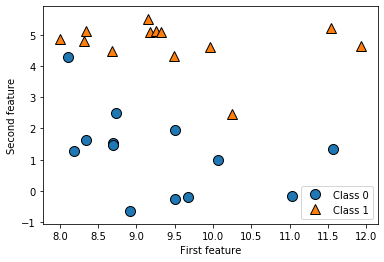

In [35]:
X, y = mglearn.datasets.make_forge() # generate dataset
print("X.shape:", X.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # plot dataset using built in tools

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

##### The wave dataset : 
- synthetic
- __regression__ dataset
- single input feature and a continuous target variable (or response) that we want to model. 

Single feature on the x-axis and the regression target (the output) on the y-axis:

Text(0, 0.5, 'Target')

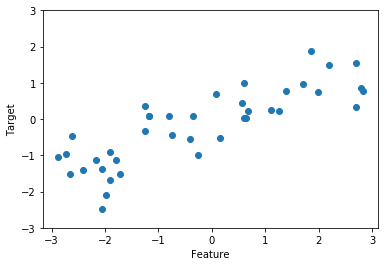

In [36]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Simple, low-dimensional datasets: easy to visualise (data with more than two features is hard to show as a plt)


##### Wisconsin Breast Cancer dataset (cancer)
- real-world classification dataset included in scikit-learn. 
- records clinical measurements of breast cancer tumors. 
- 569 data points, 30 features
- each tumor is labeled as:
    - “benign” (for harmless tumors), 357 data points 
    - “malignant” (for cancerous tumors), 212 data points 
- task : learn to predict whether a tumor is malignant based on the measurements of the tissue.


The data can be loaded using the load_breast_cancer function from scikit-learn:

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("cancer.keys():\n", cancer.keys())

print("Shape of cancer data:", cancer.data.shape)

print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class:
 {'malignant': 212, 'benign': 357}


`feature_names` attribute : semantic meaning of each feature.

In [38]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


##### Boston Housing dataset
- real-world regression dataset
- task : predict the median value of homes in several Boston neighborhoods in the 1970s using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. 
- 506 data points, 13 features

In [39]:
from sklearn.datasets import load_boston

boston = load_boston()

print("Data shape:", boston.data.shape)

Data shape: (506, 13)




<a id='ClassificationRegression'></a>
# 2. Classification and Regression
Two major types of supervised machine learning problems:
- classification
- regression.

Many algorithms have a classification and a regression variant.

###### Regression : 
The goal is to predict a __single value__ on a continuous scale. 
- predicting a person’s annual income from their education
- predicting the yield of a rice farm given attributes such as previous yields, weather, and number of employees working on the farm

###### Classification:
The goal is to predict a __class label__, which is a choice from a discrete set of possibilities.
- classifying irises into one of three possible species.
- predicting the ward of Kyoto a person lives based on their job and salary

<a id='Complexity'></a>
# 3. Complexity, Generalization, Overfitting, and Underfitting




### Complexity 

Model comlexity can include:
- the number of features in a given predictive model
- linear/nonlinear model
- algorithmic learning complexity
- computational complexity

The more complex we allow the model to be, the better we will be able to predict on the training data. 

However, if the model becomes too complex:
- we focus too much on each individual data point in our training set
- the model will not generalize well to new data

### Generlization
Evaluation on a test set : the only conclusive measure of whether an algorithm will perform well on new data. 

Intuitively we expect *simple* models to __generalize__ better to new data. 

We should try to find the simplest model that provides acceptable accuracy. 



### Overfitting
Building a model that is too complex for the amount of information we have.
<br>A model that fits too closely to the training set and consequently works well on the training set but is not able to generalize to new data.

### Underfitting
Choosing too simple a model.

There is an optimal mid-point with the best generalization performance. 

This is the model we want to find.

This principle will be demonstrated using several examples of machine learning algorithms throughout this class.

<p align="center">
  <img src="img/overfitting.png" alt="Drawing" style="width: 400px;"/>
</p>




<a id='RelationModelComplexityDatasetSize'></a>
# 4. Relation of Model Complexity to Dataset Size

Model complexity relates to __variation__ of inputs contained in your training dataset.

The larger variety of data points your dataset contains, the more complex a model you can use without overfitting. 

Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. 

(However, duplicating the same data points or collecting very similar data will not).

<a id='SupervisedMachineLearningAlgorithms'></a>
# 5. Supervised Machine Learning Algorithms 

<br> <a href='#KNN'>5.1 k-Nearest Neighbors</a>
<br> <a href='#LinearModelsRegression'>5.2 Linear Models for Regression</a> 
<br> <a href='#LinearRegression'>5.3 Linear Regression</a> 
<br> <a href='#VarianceBias'>5.4 Variance and Bias</a> 
<br> <a href='#LinearModelsClassification'>5.5 Linear Models for  Classification</a> 
<br> <a href='#LinearModelsMultiClassClassification'>5.6 Linear Models for Multi-Class Classification</a> 
<br> <a href='#SVM'>5.7 Kernelized Support Vector Machines</a> 
<br> <a href='#DecisionTrees'>5.8 Decision Trees</a> 
<br> <a href='#Binarizing'>5.9 Binarizing</a> 
<br><a href='#ANN'>5.9 Artificial Neural Networks</a>
<br><a href='#FeatureScaling'>5.10 Feature Scaling</a>


<a id='KNN'></a>
# 5.1 k-Nearest Neighbors
Arguably the simplest machine learning algorithm. 

Building the model consists only of storing the training dataset. 

To make a prediction for a new data point (stars in figure below), the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


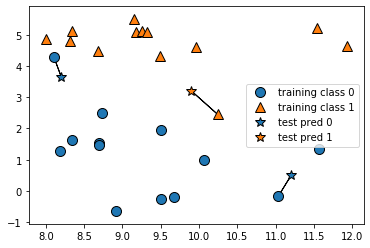

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

We can also consider an arbitrary number of neighbours, k, hence the name of the k-nearest neighbors.

When considering more than one neighbour:
- count how many neighbors belong to class 0 and how many neighbors belong to class 1. 
- assign the class that is more frequent: ie, the majority class among the k-nearest neighbors. 



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


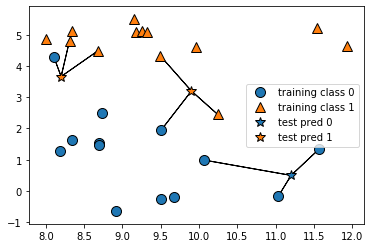

In [41]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Example: 3 closest neighbors

Prediction is shown as the color of the star. 

The prediction for the new data point at the top left is not the same as the prediction when we used only one neighbour.

## k-nearest neighbors (KNN) algorithm using `scikit-learn`

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier     # 1. Import model
X, y = mglearn.datasets.make_forge()                   # 2. Import data

X_train, X_test, y_train, y_test = train_test_split(X, # 3. Split the data
                                                    y, 
                                                    random_state=0)

clf = KNeighborsClassifier(n_neighbors=3) # 4. Instantaite the model

clf.fit(X_train, y_train)                 # 5. Fit the model to the training data

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
print("Test set predictions:", clf.predict(X_test))

print(f"Test set accuracy: {clf.score(X_test, y_test)}") # evaluate how well our model generalizes

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.8571428571428571


The model predicted the class correctly for 86% of the samples in the test dataset.

# Strengths, Weakness and Parameters of KNN

##### Important parameters:
- number of neighbors (in practice, using a small number of neighbors (3-5) often works well)
- how you measure distance between data points (by default, Euclidean distance is used) 

###### Strengths
- easy to understand
- gives reasonable performance without a lot of adjustments
- good baseline method to try before considering more advanced techniques. 

###### Weaknesses
- building the model is fast, but prediction can be slow when training set is very large (number of features/samples). 
- important to preprocess data. 
- does not perform well on datasets with many features (hundreds or more)
- very bad performance on datasets where most features are 0 most of the time (sparse datasets).

# Model Complexity vs Accuracy




__Decision boundary:__
<br>The divide between where the algorithm assigns class 0 versus where it assigns class 1.

Let's look at the decision boundaries for one, three, and nine neighbours.

The plot is coloured according to the class that would be assigned to a point in each region. 

 



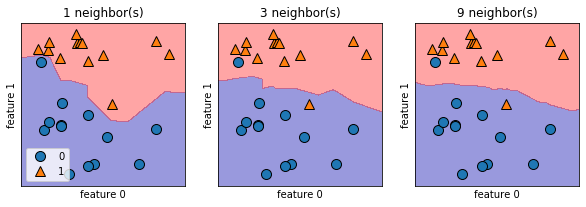

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    # 4-5 Instantaite and fit the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) # the fit method instantiates and fits in one line
    
    # plotting functions from mglearn
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) # build in scatter plot tool
    
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

Few neighbors --> decision boundary that follows the training data closely --> high model complexity.

Many neighbors --> smoother decision boundary --> low model complexity.



Consider the extreme case where __number of neighbors = number of all data points in the training set__.
<br>Each test point would have exactly the same neighbors (all training points).
<br>All predictions would be the same: the class that appears most frequently in the training set.



What is the relationship betwee __complexity__ and __generalization__?

__Complexity__ : how closely the decision boundary follows the training data. 

__Generalization__ : the accuracy with which the model can be applied to new, unknown data. 

Let's consider this using real-world data: the Breast Cancer dataset.

In [45]:
from sklearn.datasets import load_breast_cancer # 1. Import model

cancer = load_breast_cancer()                   # 2. Import data

X_train, X_test, y_train, y_test = train_test_split(cancer.data,    # 3. split into test and train data
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)

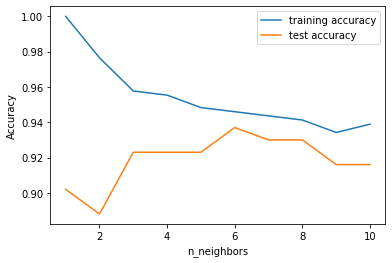

In [46]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:
    
    # 4. instantiate and fit model to train data
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train) 
    
    
    training_accuracy.append(clf.score(X_train, y_train)) # record training data accuracy
    test_accuracy.append(clf.score(X_test, y_test))       # record generalization accuracy

    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

(Real-world x-axis : plots are rarely very smooth)

Accuracy of prediction on the __training__ data scales inversely with n_neighbours. 

Accuracy of prediction on the __test__ data:
 - 1 neightbour : accuracy is lower than when using more neighbors --> model is too complex (__overfitted__).
    
 - 10 neightbours : accuracy is lower than when using less neighbors --> model is too simple (__underfitted__). 

The best performance is somewhere in the middle, using around six neighbors. 

(It is important to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.)

In other words, there is an optimal point that will give the best generalization (accuracy on the test data / new data). 

This is the model we want to find.

<p align="center">
  <img src="img/overfitting.png" alt="Drawing" style="width: 300px;"/>
</p>

The first model we studied was KNN. 

KNN is easy to understand, but not often used in practice, due to prediction being slow and its inability to handle many features. 

The next method has neither of these drawbacks...

# Linear Models



Widely used in practice

Studied extensively in the last few decades, (with origins going back over a hundred years). 

Make a prediction using a *linear function* of the input features.






<a id='LinearModelsRegression'></a>
## 5.2 Linear Models for Regression




For regression, the general prediction formula for a linear model:

$$\hat{y} = w_0x_0 + w_1x_1 + ... + w_px_p + b$$

$x_0$ to $x_p$ : features (in this example, the number of features is $p+1$) of a single data point

$w$ and $b$ : model parameters that are learned

$\hat{y}$ : the prediction the model makes. 

Predicted response is a weighted sum of the input features, with weights (which can be negative) given by $w$.





For a dataset with a single feature:

$$\hat{y} = w_0x_0 + b$$

i.e. a linear function where $w_0$ is the slope and $b$ is the y-axis intercept. 

<p align="center">
  <img src="img/hours_study.png" alt="Drawing" style="width: 300px;"/>
</p>

For more features, $w$ denotes the slopes along *each feature axis*. 

<p align="center">
  <img src="img/regression_2features.png" alt="Drawing" style="width: 300px;"/>
</p>


- a line for a single feature
- a plane when using two features
- a hyperplane in higher dimensions (when using more features).



Learning the parameters $w_0$ and $b$ on the one-dimensional wave dataset :

w[0]: 0.393906  b: -0.031804


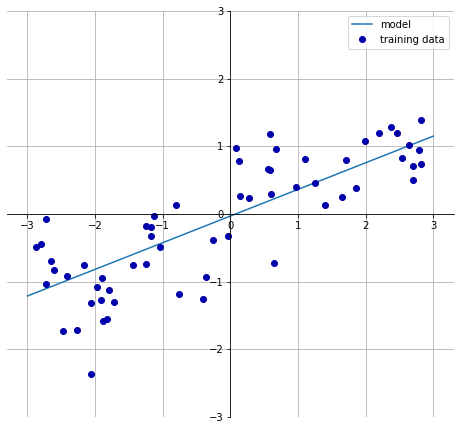

In [47]:
mglearn.plots.plot_linear_regression_wave()

The slope should be around 0.4, the y-intercept should be slightly below zero which we can confirm visually in the plot. 

There are many different linear models for regression. 

The difference is in:
- how the model parameters w and b are learned from the training data
- how model complexity can be controlled. 

We will now take a look at the most popular linear models for regression.

<a id='LinearRegression'></a>
## 5.3 Linear Regression (Ordinary Least Squares)



- simplest linear method for regression. 
- finds the parameters `w` and `b` that *minimize* the __mean squared error__ between $n$ predictions $\hat{y_i}$ and the true regression targets, $y_i$, of the training set. 
- __mean squared error__ $ \varepsilon = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2 $ <br>(sum of the squared differences between the predictions and the true values, divided by the number of samples). 


<p align="center">
  <img src="img/regression_errror.jpg" alt="Drawing" style="width: 300px;"/>
</p>




In [48]:
from sklearn.linear_model import LinearRegression # 1. import model

X, y = mglearn.datasets.make_wave(n_samples=60)   # 2. import data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # 3. split into test and train data

lr = LinearRegression().fit(X_train, y_train)     # 4. instantiate and fit model to train data 

__w__ : “slope” parameters / weights / coefficients --> stored in the `coef_` attribute.

__b__ : offset / intercept --> stored in the `intercept_` attribute.

In [49]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


#### Trailing underscore at the end of `coef_` and `intercept_`. 
`scikit-learn` always stores anything that is derived from the training data in attributes that end with a trailing underscore. 

That is to separate them from parameters that are set by the user.

`intercept_` attribute is always a single float number.

`coef_` attribute is a NumPy array with one entry per input feature. 

The wave dataset has a single input feature --> `lr.coef_` only has a single entry.

Let’s look at the training set and test set performance:

In [50]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.6700890315075756
Test set score: 0.65933685968637


The default `score` evaluation criterion for regression problems is the $R^2$ value.

$R^2$ : a statistical measure (0 to 1) that shows to what extent the variance of the independent variable(s) explains the variance of a dependent variable. 

If the $R^2$ of a model is 0.50, then approximately half of the variation in the output can be explained by the model's inputs.

An accurate model has a high $R^2$ value. 



<br>

$R^2 = 1 -$ [ratio of __sum of squares of residuals__ to __total sum of squares__]

$ \; \; \; \; \; = 1 - \frac{SS_{res}}{SS_{tot}}$


<br>



__Sum of squares of residuals__<br> $SS_{res} =\sum_{i=1}^{n}(y_i - \hat{y})^2$


__Total sum of squares__<br>(proportional to the variance of the data)<br> $SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y_i})^2$


Mean of the trainig data<br>
$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i $

$R^2$ of around 0.66 is not very good.

But, we can see that there is very little difference between the scores on the training and test sets.

##### What does this mean? 

This means we are likely underfitting, not overfitting....

<a id='VarianceBias'></a>
# 5.4 Variance and Bias



Let's come back to the idea of overfitting and underfitting and use linear regression as a way to explain this phenomenon. 

The model's:
- complexity
- over/under -fitting to the training data
- generalization / accuracy on the test data
are connected to the __prediction error__ of the machine learning algorithm.

The prediction error for any machine learning algorithm can be broken down into three parts:
- __Bias Error__
- __Variance Error__
- __Irreducible Error__ : Cannot be reduced regardless of what algorithm is used. Error introduced from the chosen framing of the problem. Caused by factors such as unknown variables that influence the mapping of the input variables to the output variable.

### Bias Error

__Bias__ : Simplifying assumptions made by a model to make the target function easier to learn.

Example : A linear model (line, plane or hyperplane) fits poorly to data along a curve due to the inflexibility of a linear model. 

<p align="center">
  <img src="img/bias.png" alt="Drawing" style="width: 300px;"/>
</p>



__Low Bias__: Less assumptions about the form of the target function, risk of overfitting.
<br>Examples : k-Nearest Neighbors, Support Vector Machines, Decision Trees

__High-Bias__: More assumptions about the form of the target function, risk of underfitting
<br>Examples: Linear Models

### Variance Error

__Variance__: the amount that the estimate of the target function will change if different training data was used.

The target function is estimated, so we should expect the algorithm to have some variance. 

However, ideally, it should not change much from one training dataset to the next
<br> --> this means that the algorithm is good at idenitifying the hidden underlying mapping between the inputs and the output variables.

<p align="center">
  <img src="img/variance.png" alt="Drawing" style="width: 300px;"/>
</p>

__Low Variance__: Small changes to the estimate of the target function with changes to the training dataset.
Examples : Linear Models

__High Variance__: Suggests large changes to the estimate of the target function with changes to the training dataset (strongly influenced by the specifics of the training data).
<br>Examples : k-Nearest Neighbors, Support Vector Machines, Decision Trees

## Bias-Variance Trade-Off

Models with *high bias* may perform __worse__ than those with *high variance* on the __training__ data set.

BUT

Models with *high bias* may __generalize__ better than those with *high variance* and consequently perform better on the __test__ data set.

<p align="center">
  <img src="img/bias_variance_balance.png" alt="Drawing" style="width: 600px;"/>
</p>

## Bias-Variance Trade-Off

The goal of any supervised machine learning algorithm is to achieve:
- low bias
- low variance

As a result, the algorithm should achieve good prediction performance.

<p align="center">
  <img src="img/bias_variance_balance.png" alt="Drawing" style="width: 600px;"/>
</p>

However, there is a trade-off at play. 

Increasing the bias will decrease the variance.
Increasing the variance will decrease the bias.


<p align="center">
  <img src="img/bias_variance_trade_off2.png" alt="Drawing" style="width: 400px;"/>
</p>


The algorithms you choose and the way you choose to configure them lead to different balances in this trade-off for your problem

__k-nearest neighbors (KNN)__
<br>Low bias and high variance. <br>The trade-off can be changed by increasing the number of neighbors which increases the bias of the model.

__Linear regression__
<br>High bias and low variance. <br>No parameters : simple to use but no way to control model complexity.<br>*Regularization*<br>A form of regression to avoid overfitting. <br>Constrains/regularizes/shrinks the coefficient estimates towards zero to discourages learning a more complex model.<br>An example *Ridge Regression* is shown in the [10 MachineLearning 2 , Supplementary](10_MachineLearning2_SupervisedLearning_Supplementary.ipynb))

In reality, we cannot calculate the real bias and variance error terms because we do not know the actual underlying target function. 

However, bias and variance help us to understand the behavior of machine learning algorithms.

Let's look again at the `wave` data set. 

The score is similar for the test and traning data.

For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). 

w[0]: 0.393906  b: -0.031804
Training set score: 0.6700890315075756
Test set score: 0.65933685968637


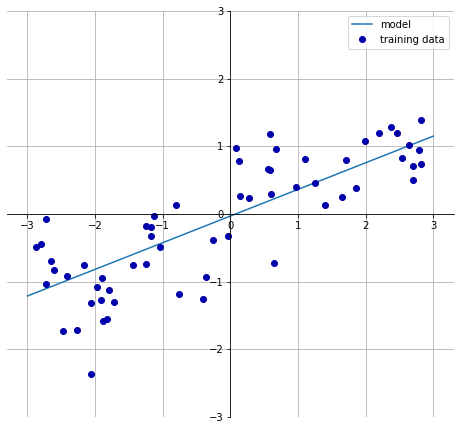

In [51]:
mglearn.plots.plot_linear_regression_wave()

print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")



However, with higher-dimensional datasets (datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

Let's see how `LinearRegression` performs on a more complex dataset: the Boston Housing dataset (506 samples, 104 derived features). 

In [52]:
X, y = mglearn.datasets.load_extended_boston()    # 2. Import data                          # 1. Load data

X_train, X_test, y_train, y_test = train_test_split(X,  # 3. Split the data
                                                    y, 
                                                    random_state=0)    
lr = LinearRegression().fit(X_train, y_train)    # 4+5 Instantiate and fit the model to the training data

When comparing training set and test set scores, the R2 on the test set is much worse than on the training set:

In [53]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.952051960903273
Test set score: 0.6074721959665863


The discrepancy between performance on the training set and the test set is a sign of __overfitting__.

We should try to find a model that allows us to control complexity. 

A technique called __regularization__ is often used<br>
This reduces the degree of influence by features the model is trained to have.  

Further study of this area is beyond the scope of this class. 
<br>One of the most commonly used alternatives to standard linear regression is *ridge regression*. 

<a id='LinearModelsClassification'></a>
## 5.5 Linear Models for  Classification




Linear models are also extensively used for classification. 

__Linear models for *regression*__
<br>The *output, $\hat{y}$*, is a linear function of the *features*: <br>(line, plane, or hyperplane) 

__Linear models for *classification*__
<br>Separates two classes using a linear function of the *features*<br>(line, a plane, or a hyperplane) 

<p align="center">
  <img src="img/linear_classifier_2feature.png" alt="Drawing" style="width: 600px;"/>
</p>




A __binary__ prediction is made using the following formula.


\begin{align*}
f &= \mathbf{w}^T\mathbf{x} + b \\
  &= w_0x_0 + w_1x_1 + ... + w_px_p + b\\
\end{align*}

The formula looks very similar to the one for linear regression.



But instead of just returning the weighted sum of the features, $f$, the outcome is used to classsify the data point as belonging to __one of two groups__, by comparing $f$ to some threshold value $T$.

$$\hat{y}= 
\begin{cases}
    1,& \text{if } f\geq T\\
    0,& \text{otherwise}
\end{cases}
$$

For a 1D classifier this simplifies to:

$$f = w_0x_0 + b$$

$$\hat{y}= 
\begin{cases}
    1,& \text{if } f\geq T\\
    0,& \text{otherwise}
\end{cases}
$$

For example, deciding if a tumor is malignant or not based on a threshold size.

<p align="center">
  <img src="img/malignant.png" alt="Drawing" style="width: 400px;"/>
</p>


Writing this as one line:

\begin{align*}
\hat{y} &= w_0x_0 + w_1x_1 + ... + w_px_p + b \geq T \\
        &= w_0x_0 + w_1x_1 + ... + w_px_p + b - T \geq 0\\
        &= w_0x_0 + w_1x_1 + ... + w_px_p + b  \geq 0\\
\end{align*}

$\hat{y}$ is a boolean `True`/`False` or `0`/`1` value

<p align="center">
  <img src="img/linear_classifier_2feature.png" alt="Drawing" style="width: 600px;"/>
</p>

The two most common linear classification algorithms are:
- logistic regression (`linear_model.LogisticRegression`) [a classification algorithm, despite it's name!]
- linear support vector machines (linear SVMs) `svm.LinearSVC` (SVC stands for support vector classifier). 

We can apply the LogisticRegression and LinearSVC models to the forge dataset, and visualize the decision boundary as found by the linear models.

A `for` loop is used to loop through each of the two models:
- fitting the data
- plotting the output

On the plot, the decision boundary is shown as a straight line.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


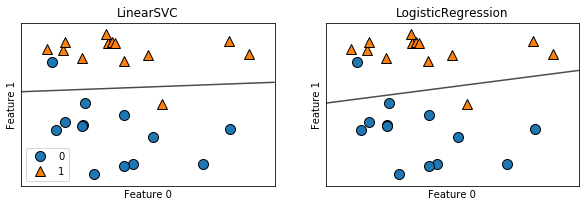

In [54]:
from sklearn.linear_model import LogisticRegression # 1. Import model
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()                # 2. Import data           



fig, axes = plt.subplots(1, 2, figsize=(10, 3))     # axes to plot  
models = [LinearSVC(), LogisticRegression()]        # models to fit

for model, ax in zip(models, axes): 
    
    clf = model.fit(X, y)                       # 3. Instantiate and fit model to data                    
    
    # plot the output
    mglearn.plots.plot_2d_separator(clf,        # fitted model     
                                    X,          # data
                                    fill=False, 
                                    eps=0.5,
                                    ax=ax, 
                                    alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The boundaries separate the area classified as class 1 on the top from the area classified as class 0 on the bottom. 

Any new data point that lies:
- above the black line will be classified as class 1 
- below the black line will be classified as class 0

Note that both misclassify two of the points. 

<a id='LinearModelsMultiClassClassification'></a>
## 5.6 Linear Models for Multi-Class Classification




Many linear classification models are for binary classification only.
<br>They don’t extend naturally to the multiclass case.
<br>(exception : logistic regression). 

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the *__one-vs.-rest__* approach. 



##### one-vs.-rest
- A binary model is learned for each class that tries to separate that class from all of the *other* classes.
<br>This results in as many binary models as there are classes. 

- To make a prediction, all binary classifiers are run on a test data point. 

- The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction

 AND PARAMETERS

#### Model Parameters : Regularization
`alpha` : regression models
`C` : LinearSVC and LogisticRegression. 

Large values for `alpha` or small values for `C` mean simple models. 

Usually `C` and `alpha` are searched for on a logarithmic scale.

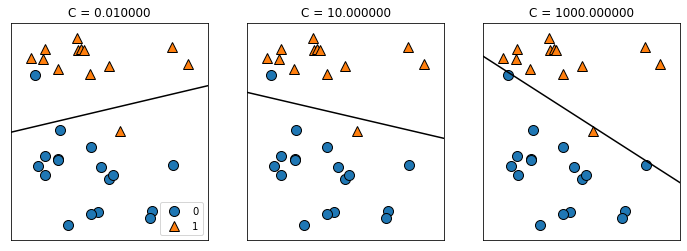

In [55]:
mglearn.plots.plot_linear_svc_regularization()

Higher `C` --> `LogisticRegression` / `LinearSVC` try to fit the training set as best as possible
<br>Lower `C` --> The models put more emphasis on finding a coefficient vector (w) that is close to zero.

Higher `C` --> stresses the importance that each individual data point be classified correctly. 
<br>Lower `C` --> algorithms try to adjust to the “majority” of data points




#### Strengths

- Fast to train
- Fast to predict
- Work well with very large datasets and sparse data. 
- Relatively easy to understand how a prediction is made, using the formulas for regression and classification. 



<a id='SVM'></a>
## 5.7 Kernelized Support Vector Machines :  Linear Models and Non-Linear Features





We have seen __linear__ support vector machines for classification. 

Kernelized support vector machines (SVMs) allow for more complex models that are not defined simply by hyperplanes in the input space. 

We will restrict our study to support vector classification using `SVC`. 

Similar concepts apply to support vector regression, using `SVR`.



The mathematics behind kernelized support vector machines is quite involved, and is therefore beyond the scope of this course. 

We will study an overview of how the method works.

As we have seen, linear models can be limiting in low-dimensional spaces.

Lines and hyperplanes have limited flexibility. 

One way to make a linear model more flexible is by adding more features.

Example : adding interactions or polynomials of the input features.

Let's import a synthetic data set to demonstrate:

Text(0, 0.5, 'Feature 1')

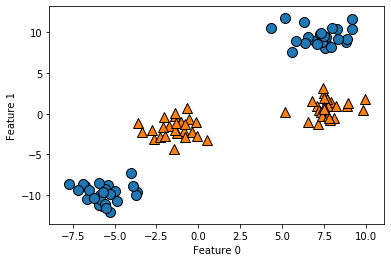

In [56]:
from sklearn.datasets import make_blobs  # generates a sample data set for testing clustering algorithms

X, y = make_blobs(centers=4,             # number of clusters to detect
                  random_state=8)        # random seed

y = y % 2                                # remainder when divided by 2 : makes all data either class 0 or class 1

mglearn.discrete_scatter(X[:, 0],  # x coordinate
                         X[:, 1],  # y coordinate
                         y)        # class
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


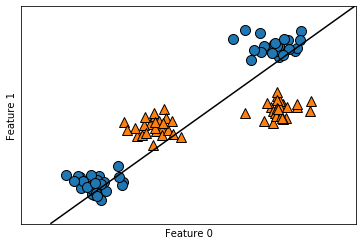

In [57]:
from sklearn.svm import LinearSVC               # 1. Import model

# plot data as before
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

linear_svm = LinearSVC().fit(X, y)   # 4+5. Instantaite and fit the model
mglearn.plots.plot_2d_separator(linear_svm, X)

Now let’s expand the set of input features to include an additional feature.

Additional feature : __feature1$^2$__

Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, (feature0, feature1, feature1 ** 2)

(Don't worry too much about the unfmailiarity of the code, it includes several things we've not studied).


Text(0.5, 0, 'feature1 ** 2')

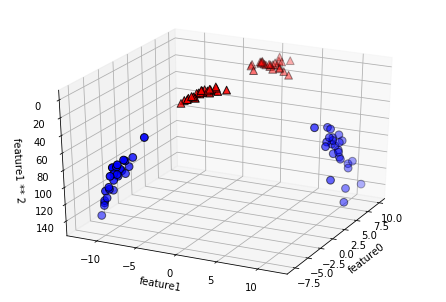

In [58]:
# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

It is now indeed possible to separate the two classes using a linear model: a plane in 3D. 

We can confirm this by fitting a linear model to the augmented data:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

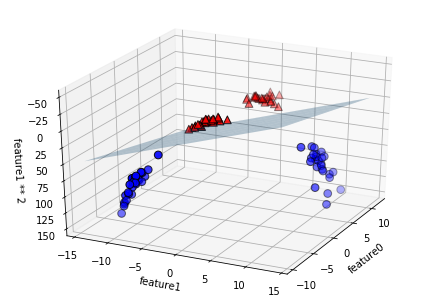

In [59]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. 

It is no longer a line, but more of an ellipse:

Text(0, 0.5, 'Feature 1')

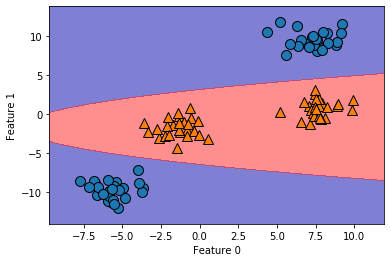

In [60]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), 
                                            YY.ravel(), 
                                            ZZ.ravel()])
plt.contourf(XX, YY, 
             dec.reshape(XX.shape), 
             levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, 
             alpha=0.5)

mglearn.discrete_scatter(X[:, 0], 
                         X[:, 1], 
                         y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




<a id='DecisionTrees'></a>
# 5.8 Decision Trees




Decision trees are widely used models for classification and regression tasks. 

They learn a hierarchy of if/else questions, leading to a decision.

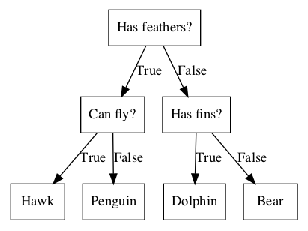

In [61]:
mglearn.plots.plot_animal_tree()

Each node in the tree represents either:
- a question
- a terminal node (leaf) that contains the answer. 

The edges connect the answers to a question with the next question.

## Building Decision Trees
Let’s go through the process of building a decision tree for the `two_moons` 2D classification dataset shown below. 

<p align="center">
  <img src="img/two_moons.png" alt="Drawing" style="width: 600px;"/>
</p>



Usually data is not in the form of binary `True/False` features as in the animal example. 

It is usually represented as continuous numerical features such as in the `two_moons` dataset.

The tests that are used on continuous data are of the form __“Is feature i > a?”__

Machines, unlike humans, cannot understand the raw text. 

Machines can only see numbers

Even when the data is in binary `True/False` format it must be encoded/converted to a numerical form (though not necessarily on a continuous scale). 



<a id='Binarizing'></a>
## 5.9 Binarizing




Binarization is used when you want to convert a numerical/text feature vector into a Boolean vector. 

__Example : Image processing (Image binarization)__
<br>A color or grayscale image is transformed into a binary image (an image with only two colors, typically, black and white).

When we have a feature that can take one of several `string` values, one way to deal with this is to __binarize__ the data in a one-vs-all fashion. 

- Generates a column for each possible solution.
- Place 1 in the column that matches the data point.
- Place 0 in all other columns. 



In [71]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [72]:
from sklearn import preprocessing     # import the model
lb = preprocessing.LabelBinarizer()   # instantiate the model

In [73]:
print(type(planets.method))

<class 'pandas.core.series.Series'>


`fit` takes the names of all possible classes of the feature.

This can be given as a single column of the DataFrame, unique values will be extracted:
```
lb.fit(planets.method)
```
...or it can be input as a list:

In [74]:
lb.fit(['Astrometry' ,
        'Eclipse Timing Variations' ,
        'Imaging' ,
        'Microlensing'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

We can see the extracted classes:

In [75]:
print(lb.classes_)
lb.classes_.shape

['Astrometry' 'Eclipse Timing Variations' 'Imaging' 'Microlensing']


(4,)

A series can then be `transform`ed to binary data. 

The rows of the output array are the input values. 

The columns are the possible classes of the features. 

In [76]:
lb.transform(['Astrometry', 'Astrometry', 'Microlensing'])

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In many cases, we want to extract the possible values (`fit`) and `trandform` the same series of data : a column of the data frame:

In [77]:
lb.fit_transform(planets.method)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [78]:
lb.classes_

array(['Astrometry', 'Eclipse Timing Variations', 'Imaging',
       'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
       'Transit Timing Variations'], dtype='<U29')

Lastly, we want to add the binarized data to the DataFrame to enable us to run machine learning algorithms on it that require numerical data. 

In [79]:
# make a DataFrame from the binarized data and extracted classes
binarized = pd.DataFrame(lb.fit_transform(planets.method), 
                         columns=lb.classes_)



# Add new data to the DataFrame
planets = planets.join(binarized, rsuffix='_') 
#planets = pd.concat([planets, binarized], axis=1) 
planets.head()

,method,number,orbital_period,mass,distance,year,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
0,Radial Velocity,1,269.300,7.10,77.40,2006,0,0,0,0,0,0,0,1,0,0
1,Radial Velocity,1,874.774,2.21,56.95,2008,0,0,0,0,0,0,0,1,0,0
2,Radial Velocity,1,763.000,2.60,19.84,2011,0,0,0,0,0,0,0,1,0,0
3,Radial Velocity,1,326.030,19.40,110.62,2007,0,0,0,0,0,0,0,1,0,0
4,Radial Velocity,1,516.220,10.50,119.47,2009,0,0,0,0,0,0,0,1,0,0


Now, just be careful to use the __binarized data__, not the `string` data when fitting your machine learing model

Example: Linaer Regression 

In [80]:
from sklearn.linear_model import LinearRegression # 1. import model

planets = planets.dropna()


# Trying to fit the model using string data will casue an error
# X_train, X_test, y_train, y_test = train_test_split(planets.loc[:,:'distance'],
#                                                     planets['year'],
#                                                     random_state=42) # 3. split into test and train data


# The binarized columns must be selected instead when fitting the model
X_train, X_test, y_train, y_test = train_test_split(planets.loc[:,'number':].drop('year', axis=1),
                                                    planets['year'],
                                                    random_state=42) # 3. split into test and train data

lr = LinearRegression().fit(X_train, y_train)     # 4. instantiate and fit model to train data

lr.score(X_test, y_test)     # 4. instantiate and fit model to train data 




0.14715153726961194

Learning a decision tree means learning the sequence of if/else questions (tests) that gets us to the correct answer most quickly. 

The algorithm searches all possible tests and finds the one that is most informative about the target variable. 

The first test: Splitting the dataset horizontally at `x[1]=0.0596` [feature 1=0.0596 ], (indicated by a black line), is the most effective seperator for dividing class 0 from class 1. 


<p align="center">
  <img src="img/2-24.png" alt="Drawing" style="width: 600px;"/>
</p>


The top node (root), represents the whole dataset (50 points class 0, 50 points class 1). 

`True` : data point is assigned to left node (2 points class 0, 32 points class 1). 

`False` : assigned to right node (48 points class 0, 18 points class 1). 



To build a more accurate model we repeat the process of looking for the most effective test in each region.

Note : the test in each region can differ from each other.

The second test is based on `x[0]` (feature 0).


<p align="center">
  <img src="img/2-25.png" alt="Drawing" style="width: 600px;"/>
</p>

This recursive process builds a binary tree of decisions, with each node containing a test. 

You can think of each test as splitting the part of the data that is currently being considered along one axis. 

Each test concerns only a single feature. 




This hierarchical partitioning of the data is repeated until each region in the partition (each leaf in the tree) only contains a single target value:
- a single class
- a single regression value

Final partitioning:

<p align="center">
  <img src="img/2-26.png" alt="Drawing" style="width: 800px;"/>
</p>

To make a prediction on a new data point:
1. checking which region of the partition of the feature space the point lies in
1. predicting the class in that is dominant in that region. 

The region is found by traversing the tree. 



### Regression Trees 
It is also possible to use trees for regression tasks, using exactly the same technique. 

The output for this data point is the mean target of the training points in this leaf.

Example: 
<br>43.43 is the mean target value for inputs with Industry < 748 and Population < 190

<p align="center">
  <img src="img/regression_tree.png" alt="Drawing" style="width: 600px;"/>
</p>

### CONTROLLING COMPLEXITY OF DECISION TREES

Building a tree as described here typically leads to models that are very complex and highly overfit to the training data. 

"Pure leaves" (containing a single class only) mean that a tree is 100% accurate on the training set.

<p align="center">
  <img src="img/2-26.png" alt="Drawing" style="width: 600px;"/>
</p>

Evidence of overfitting : 
<br>Small class 1 (red) region surrounded by class 0 (blue) regions. 
<br>Small strip class 0 (blue) around large class 1 (red) region on the right. 

This is not a typical decision boundary to look.




There are two common strategies to prevent overfitting: 
- stopping the creation of the tree early (pre-pruning):
    - limiting the maximum depth of the tree
    - limiting the maximum number of leaves
    - requiring a minimum number of points in a node to keep splitting it
- building the tree but then removing or collapsing nodes that contain little information (post-pruning)

Decision trees in `scikit-learn`:
- `DecisionTreeRegressor`
- `DecisionTreeClassifier`

`scikit-learn` only implements pre-pruning, not post-pruning.



Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. 

As always, we:
1. import the dataset
2. split it into a training and a test part.
3. build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). 

In [62]:
from sklearn.tree import DecisionTreeClassifier       # 1. Import model

cancer = load_breast_cancer()                         # 2. Import data

X_train, X_test, y_train, y_test = train_test_split(cancer.data,           # 3. Split data
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

tree = DecisionTreeClassifier(random_state=0)        # 3. Instantiate model

tree.fit(X_train, y_train)                           # 5. Fit model

print(f"Accuracy on training set: {tree.score(X_train, y_train)}")          # 6. Evaluate the accuracy of the model on the test data
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


As expected:
- accuracy on the training set is 100%—because the leaves are pure
- accuracy on test set is slightly worse



Now let’s apply pre-pruning to the tree, to stop the tree developing before we perfectly fit to the training data. 

Here we set max_depth=4, meaning only four consecutive questions can be asked.

Limiting the depth of the tree decreases overfitting. 

This leads to a lower accuracy on the training set, but an improvement on the test set:

In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


## ANALYZING DECISION TREES
We can visualize the tree using the `export_graphviz` function from the `tree` module. 

This writes a file in the .dot file format, which is a text file format for storing graphs. 

We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:



In [64]:
from sklearn.tree import export_graphviz

export_graphviz(tree,                     # 1. fitted mode
                out_file="img/tree.dot",  # 2. output file name
                class_names=["malignant", "benign"],  # 3. pass class names for labelling
                feature_names=cancer.feature_names,   # 4. pass feature names for labelling
                impurity=False,                       # 5. Do not show impurity 
                filled=True                           # 6. color the nodes to reflect the majority class
               )

We can read this file and visualize it using the graphviz module 
<br>(or any program that can read .dot files):

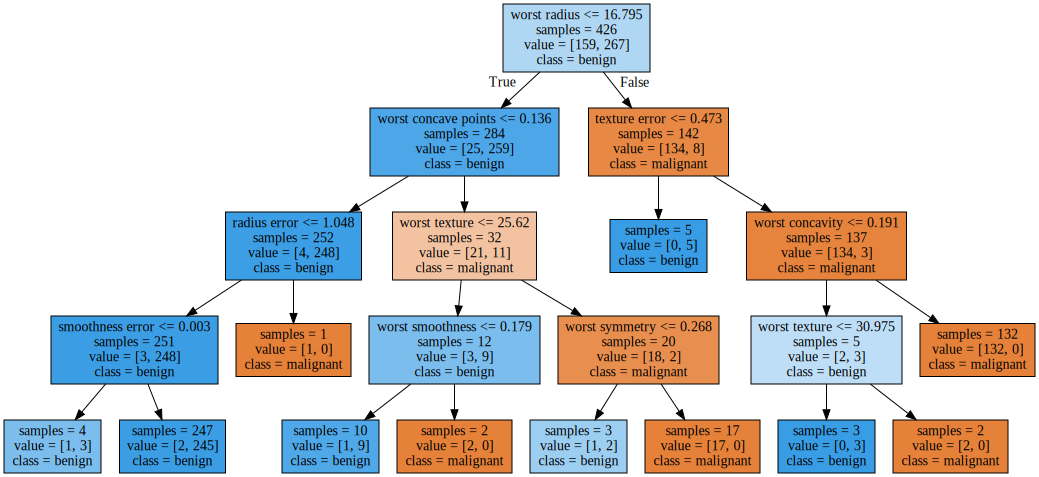

In [65]:
import graphviz

with open("img/tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

The visualization provides a good in-depth view of how the algorithm makes predictions.

- __samples__ : the number of samples in that node.
- __value__ :  the number of samples per class.

However, even with a tree of depth four (as seen here) the tree can become a bit overwhelming. 

Deeper trees (a depth of 10 is not uncommon) are even harder to read. 

## FEATURE IMPORTANCE IN TREES

A useful way to inspecting the tree is to find out which path most of the data actually takes. 

Following the branches to the right,  `worst radius > 16.795` creates a node that contains:
- 8 benign
- 134 malignant samples
The rest of this side of the tree then uses some finer distinctions but of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in __the leaf to the very right__.

Following the branches to the left, `worst radius <= 16.795`  :
- 25 malignant
- 259 benign samples
Nearly all of the benign samples end up in __the second leaf from the left__. 

This is useful information but it's difficult to see by looking at the whole tree. 

There are some useful properties that we can derive to summarize the workings of the tree. 

The most commonly used is __feature importance__ : a number between 0 and 1 for each feature
- 0 = not used at all for decision making
- 1 = perfectly predicts the target

The feature importances always sum to 1

In [66]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


We can visualize the feature importances as a simple `matplotlib` bar chart.  

(-1, 30)

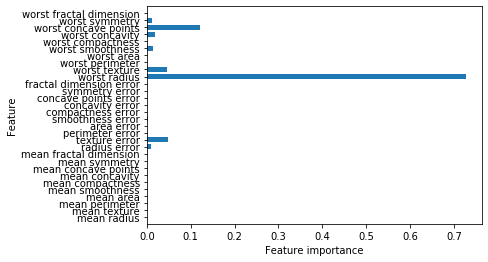

In [69]:
# number of features
n_features = cancer.data.shape[1]

# bar chart showing importance of each feature
plt.barh(np.arange(n_features), 
         tree.feature_importances_, # use the method feature_importance_ as above
         align='center')

plt.yticks(np.arange(n_features), 
           cancer.feature_names)

plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

The feature used in first test (`worst radius`) is the most important feature.

This confirms our observations in analyzing that the first split separates the two classes fairly well. 

<p align="center">
  <img src="img/2-27.png" alt="Drawing" style="width: 600px;"/>
</p>



Note : 

If a feature has a low value in feature_importance_, it doesn’t necessarily mean that this feature is uninformative. 

It only means that the feature was not picked by the tree.

This is likely because another feature encodes the same information.



In contrast to the coefficients in linear models, feature importances don’t encode which class a feature is indicative of. 

The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant. 

## Parameters

Pre-pruning parameters that stop the building of the tree before it is fully developed to prevent overfitting.

Usually either:
- `max_depth`
- `max_leaf_nodes`
- `min_samples_leaf` 

## Strengths and weaknesses

Advantages: 
- Easily be visualized and understood (at least for smaller trees)
- Each feature is processed separately so the algorithms do not require scaling/normalization/standardization of the data.
- Can work on features that are on completely different scales, or a mix of binary and continuous features.

Disadvantages:
- Even with pre-pruning, the model tends to overfit and provide poor generalization performance. 

Solution : in most applications, __ensemble methods__ are used in place of a single decision tree.

## Ensembles of Decision Trees
Ensembles are methods that combine multiple machine learning models to create more powerful models.

We won't go into much detail on these, but study a short summary of the two most widely used methods. 




#### RANDOM FORESTS
Random forests are one way to address the problem of overfitting. 
<br>A random forest is a collection of decision trees, where each tree:
- is slightly different from the others
- will and overfit in a different way from the others

We can reduce the amount of overfitting by averaging the results. 


#### GRADIENT BOOSTED REGRESSION TREES (GRADIENT BOOSTING MACHINES)
A gradient boosted regression tree is a collection of decision trees, where trees are arranged in serial to correct the mistakes of the previous one. 

## Bias and Variance Revisitied. 
You can see a general trend in the examples so far:

__Linear machine learning algorithms__ often have a high bias but a low variance.

__Nonlinear machine learning algorithms__ often have a low bias but a high variance.

The parameterization of machine learning algorithms is used to balance bias and variance.



Two examples of configuring the bias-variance trade-off for specific algorithms:


__k-nearest neighbors (KNN)__
<br>Low bias and high variance
<br>Trade-off can be changed by increasing the value of k (number of neighbors) 

__Support vector machine (SVM)__
<br>Low bias and high variance.
<br>Trade-off can be changed by increasing the `C` parameter (influences the number of violations of the margin allowed in the training data) 








<a id='ANN'></a>
## 5.9 Artificial Neural Networks (ANN, Deep Learning) 



Promising in many machine learning applications.

Often tailored very carefully to a specific use case. 

We will discuss some relatively simple type of ANN: <br>__Multilayer Perceptron__ [MLPs / (vanilla) feed-forward neural networks / neural networks].

(Used for classification and regression.)

<img src="img/machine_learning_AI.png" alt="Drawing" style="width: 300px;"/>

## THE NEURAL NETWORK MODEL
MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:

$$\hat{y} = w_0x_0 + w_1x_1 + ... + w_px_p + b$$

In words, $\hat{y}$ is a weighted sum of the input features $x_0$ to $x_p$, weighted by the learned coefficients $w_0$ to $w_p$. 

We can also visualize this graphically...

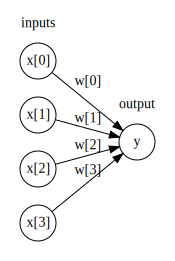

In [38]:
display(mglearn.plots.plot_logistic_regression_graph())

Each node on the left represents an input feature.

The connecting lines represent the learned coefficients.

The node on the right represents the output, which is a weighted sum of the inputs.

In an MLP the process of computing weighted sums is repeated multiple times.

First __hidden units__ are computed that represent an intermediate processing step.

Then these are again combined using weighted sums to give the final result.

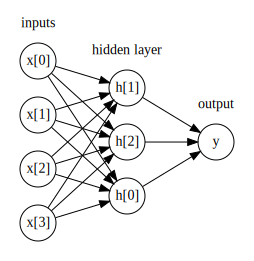

In [39]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has *a lot* more coefficients (also called weights) to learn.

There is:
- one between every input and every hidden unit (which make up the hidden layer)
- one between every unit in the hidden layer and the output.

Computing a __series__ of weighted sums is mathematically the same as computing just __one weighted sum__.

To make this model truly more powerful than a linear model, we need an additional feature. 

After computing a weighted sum for each *hidden* unit, a *nonlinear* function is applied to the result.

The result of this function is then used in the weighted sum that computes the output, $\hat{y}$.



This function is usually either:
- __rectifying nonlinearity__ (rectified linear unit or relu) : cuts off values below zero
- __hyperbolic tangent__ (tanh) : saturates to –1 for low input values and +1 for high input values

Using either nonlinear function allows the neural network to learn much more complicated functions than a linear model could. 

Text(0, 0.5, 'relu(x), tanh(x)')

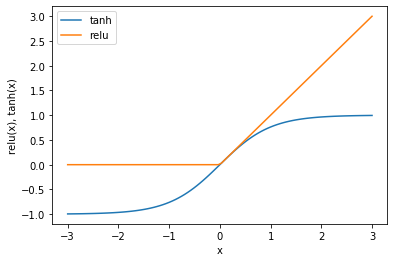

In [40]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

<img src="img/ANN.png" alt="Drawing" style="width: 300px;"/>

$x$ : input features

$\hat{y}$ : the computed output

Weights $v$ and $w$ : learned from data
>$w$ : weights between the input $x$ and the hidden layer $h$.<br>
>$v$ : weights between the hidden layer $h$ and the output $\hat{y}$. 

$h$ : intermediate computations. 



<img src="img/ANN.png" alt="Drawing" style="width: 300px;"/>

The full formula for computing $\hat{y}$ , for the small neural network pictured, in the case of regression (using tanh nonlinearity):

$$h_0 = tanh(\; \; w_{0,0}x_0 + w_{1,0}x_1 + w_{2,0}x_2 + w_{3,0}x_3 + b_0 \; \;)$$
$$h_1 = tanh(\; \; w_{0,1}x_0 + w_{1,1}x_1 + w_{2,1}x_2 + w_{3,1}x_3 + b_1 \; \;)$$
$$h_2 = tanh(\; \; w_{0,2}x_0 + w_{1,2}x_1 + w_{2,2}x_2 + w_{3,2}x_3 + b_2 \; \;)$$

$$\hat{y} = v_0h_0 + v_1h_1 + v_2h_2 + b$$

An important parameter that needs to be set by the user is the __number of nodes in the hidden layer__. 

This may be as small as 10 (small or simple datasets) and as big as 10,000 (very complex data). 

It is also possible to add additional hidden layers:

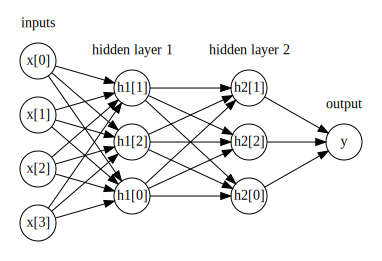

In [41]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is what inspired the term “deep learning.”

The most important parameters are:
- the number of layers
- and the number of hidden units per layer

You should start with one or two *hidden layers*, and possibly expand from there. 

The number of *nodes per hidden layer* is often similar to the number of input features, but rarely higher than in the low to mid-thousands.

A common way to adjust parameters in a neural network:
- first create a network that is large enough (many layers and nodes) to overfit (this makes sure that the task can actually be learned by the network). 
- once you know the training data can be learned, shrink the network to improve generalization performance.

## Tuning Neural Networks
Let’s see this tuning in action by applying the `MLPClassifier` to the `two_moons` dataset from earlier.

We will generate 100 data points : `n_samples=100`

The data has two features : `x` and `y` coordiates of each point. 

Text(0, 0.5, 'Feature 1')

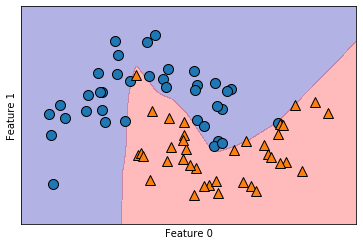

In [57]:
from sklearn.neural_network import MLPClassifier # 1. import model

from sklearn.datasets import make_moons          # 2. import data
X, y = make_moons(n_samples=100,  
                  noise=0.25, 
                  random_state=3) 


X_train, X_test, y_train, y_test = train_test_split(X,  # 3. Split the data
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0).fit(X_train, # 4+5 Instantiate + train
                                        y_train) 


mglearn.plots.plot_2d_separator(mlp,       # Plot boundary line
                                X_train, 
                                fill=True, 
                                alpha=.3)


mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) # Plot data points


plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The neural network learned a very nonlinear but relatively smooth decision boundary. 

We used default variable space optimization solver='lbfgs':

```
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
```

We will discuss solvers further later. 

By default, the MLP uses 100 hidden nodes.

This is quite a lot for this small dataset. 

Remeber, the number of *nodes per hidden layer* is often similar to the number of input features: 2 in this case. 

We can reduce the number (which reduces the complexity of the model) and still get a good result.

Text(0, 0.5, 'Feature 1')

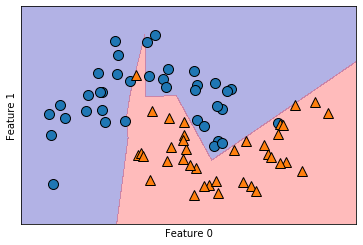

In [60]:
# Model with 1 hidden layer with 10 nodes

mlp = MLPClassifier(solver='lbfgs',          # 4. Instantaite the model
                    random_state=0, 
                    hidden_layer_sizes=[10]) # 1 hidden layer with 10 nodes

mlp.fit(X_train, y_train)                    # 5. Fit the model 


# plot the output
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary is less smooth. 

The default nonlinearity is relu. 

With a single hidden layer, this means the decision function will be made up of 10 straight line segments. 



If we want a smoother decision boundary, we can:
- add more hidden units 
- add a second hidden layer
- use the tanh nonlinearity 

Text(0, 0.5, 'Feature 1')

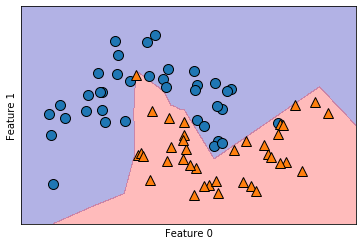

In [61]:
# two hidden layers, with 10 nodes each

mlp = MLPClassifier(solver='lbfgs', random_state=0, # 4. Instantaite the model 
                    hidden_layer_sizes=[10, 10])    # two hidden layers, with 10 nodes each

mlp.fit(X_train, y_train)  # 5. Fit the model


# plot the data
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

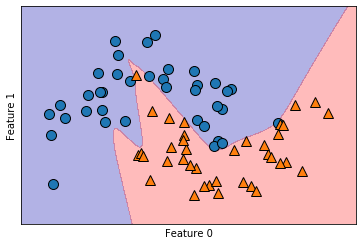

In [45]:
# two hidden layers, with 10 nodes each, tan non-linearity

mlp = MLPClassifier(solver='lbfgs',    # 4. Instantaite the model
                    activation='tanh', # tanh nonlinearity
                    random_state=0, 
                    hidden_layer_sizes=[10, 10]) # two hidden layers, with 10 units each

mlp.fit(X_train, y_train)              # 5. Fit the model


mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Model Parameters

Controlling the complexity of a neural network: 
- number of hidden layers
- number of units in each hidden layer

<br>... several more methods (e.g. regularization)



Important property of neural networks : weights are set randomly before learning is started.

Random initialization affects the model that is learned. 

That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds. 

If the networks are large, and their complexity is chosen properly, this should not affect accuracy too much.

But it is worth keeping in mind (particularly for smaller networks). 

The following code plots eight models each learned with:
- same settings of the parameters
- different random seed

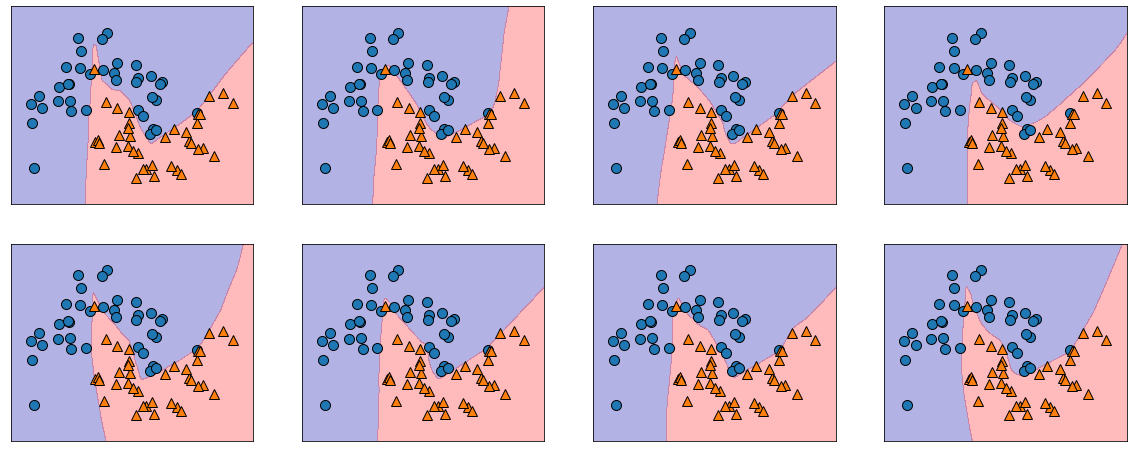

In [46]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    
    mlp = MLPClassifier(solver='lbfgs', # 4. Instantaite the model
                        random_state=i, 
                        hidden_layer_sizes=[100, 100])
    
    mlp.fit(X_train, y_train)           # 5. Fit the model to the training data
    
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

Let's apply a neural network to some real world data.

We will use:
- the `MLPClassifier`
- the Breast Cancer dataset

In [63]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,     # 3. split the data
                                                    cancer.target, 
                                                    random_state=0)

mlp = MLPClassifier(random_state=42)   # 4. instantiate the model
mlp.fit(X_train, y_train)              # 5. fit the model to the training data


# 6. Evaluate the accuracy
print(f"Accuracy on training set: {mlp.score(X_train, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test, y_test)}")

Accuracy on training set: 0.9389671361502347
Accuracy on test set: 0.916083916083916


The accuracy of the MLP is quite good, but not as good as the other models. 

This is likely due to __scaling__ of the data. 

Neural networks expect all input features to vary in a *similar* way
<br>(and ideally to have a mean of 0, and a variance of 1). 

We must rescale our data so that it fulfills these requirements. 
<br>We'll do this by hand for now to see how it works.  

<a id='FeatureScaling'></a>
## 5.10 Feature Scaling




The range of values of raw data varies widely.

In some machine learning algorithms, objective functions will not work properly without normalization. 

 


For example, many classifiers calculate the distance between two points by the Euclidean distance. 

<img src="img/euclidian.jpg" alt="Drawing" style="width: 300px;"/>

If one of the features has a broad range of values, the distance will be governed by this particular feature.

Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Feature scaling is used to normalize the range of independent variables or features of data.

A number of methods are available...

### Rescaling (min-max normalization)

Rescaling the range of features to range [0, 1] or [−1, 1]

Target range depends on the nature of the data and is not scaled.

General formula for min-max of [0, 1] 

$$x' = \frac{x - x_{min}}{x_{max}-x_{min}}$$

$x' = $ normalized value

Rescaling the range of features to range [0, 1] or [−1, 1]
<img src="img/min_max_scaling.png" alt="Drawing" style="width: 300px;"/>

Scaling is important in the algorithms such as:
- support vector machines (SVM)
- k-nearest neighbors (KNN) 

where distance between the data points is important. 

### Mean normalization

So all the values will be between 0 and 1.

$$x' = \frac{x - \bar{x}}{x_{max}-x_{min}}$$

$x' = $ normalized value

<img src="img/normalization.png" alt="Drawing" style="width: 300px;"/>

__Scaling__ : changing the *range* of the data.

__Normalization__ : changing the *shape of the distribution* of the data.

### Standardization (Z-score Normalization)

$$x' = \frac{x - \bar{x}}{\sigma}$$

$x' = $ normalized value
<br>$\sigma = $ standard deviation (desribes spread of $x$ data about the mean) = $\sqrt{\frac{1}{N-1}\sum_{N}^{i=1}(x_i - \bar{x})^2}$ , for $N$ data points



Transforms data --> resulting distribution:
- mean $x' = 0$ 
- standard deviation, ${\sigma}=1$

<img src="img/standardization.gif" alt="Drawing" style="width: 300px;"/>

Subtracting the mean,  $x'$ from each data point, $x$ : <br>shift left or right by equal aount, new mean = 0.

Divide by standard deviation ${\sigma}$:
<br>Changes the shape of distribution, new ${\sigma}=$ 1

This distribution is widely used in:
- SVM
- logistics regression
- neural networks

For now, we will compute it by hand

<img src="img/standardization.gif" alt="Drawing" style="width: 300px;"/>

In [48]:
mean_on_train = X_train.mean(axis=0)   # mean value per feature, training set
std_on_train = X_train.std(axis=0)     # standard deviation (std) of each feature, training set

X_train_scaled = (X_train - mean_on_train) / std_on_train # subtract the mean, scale inverse std --> mean=0 and std=1
X_test_scaled = (X_test - mean_on_train) / std_on_train   # SAME transformation on the test set

mlp = MLPClassifier(random_state=0)    # instantaite model
mlp.fit(X_train_scaled, y_train)       # fit model to SCALED traning data

print(f"Accuracy on training set: {mlp.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test)}")

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.965034965034965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling.

We get a warning from the model, that tells us that the maximum number of iterations used to train the model weights has been reached. 



We can increase the number of iterations:

In [67]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {mlp.score(X_train_scaled, y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


Increasing the number of iterations only increased the training set performance, not the generalization performance. 

We can try to decrease the model’s complexity to get better generalization performance. 

 If you are interested in working with more flexible or larger models,  look beyond `scikit-learn` into libraries specifically for deep learnig:
- `keras`
- `lasagna`
- `tensor-flow`

All  allow the use of high-performance graphics processing units (GPUs), (which scikit-learn does not support). 

Using GPUs allows us to accelerate computations by factors of 10x to 100x, and they are essential for applying deep learning methods to large-scale datasets.

## Strengths and weaknesses
Advantages 
- Able to capture information contained in large amounts of data and build incredibly complex models. 
- Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

Disadvantages
- Often take a long time to train. 
- Require careful preprocessing of the data, as we saw here. 




ANNs work best with “homogeneous” data, where all the features have similar meanings. 

For data that has very different kinds of features, tree-based models might work better. 

Tuning neural network parameters and architectures is an extensive area of study : today we covered a brief introduction  of possible ways to adjust neural network models and how to train them.

# Summary
- Classification : The goal is to predict a __class label__, which is a choice from a discrete set of possibilities.
- Regression : The goal is to predict a __single value__ on a continuous scale.
- Model complexity : 
- Generalization : training a model that is able to perform well on new, previously unseen data. 
- Overfitting : a model that focuses too much on the training data and is not able to generalize to new data very well
- Underfitting : a model that cannot capture the variations present in the training data

### Model Summary

__K Nearest neighbors (KNN)__
<br>Good for small datasets, easy to understand/explain.

__Linear models__
<br>Good for very large datasets and very high-dimensional data.

__Decision trees__
<br>Very fast, don’t require scaling of the data, can be visualized and easily explained.

__Support vector machines (SVM)__
<br>Powerful for medium-sized datasets of features with similar meaning. 
<br>Require scaling of data, sensitive to parameters.

__Neural networks__
<br>Can build very complex models, particularly for large datasets. 
<br>Sensitive to scaling of the data and to the choice of parameters. 
<br>Large models need a long time to train.



### Applying Machine Learning Models 

- Different algorithms have different ways to control model complexity.
- Setting the right parameters can be important for good performance. 
- Some algorithms are also sensitive to how we represent the input data (scaling in particular). 
- Applying an algorithm to a dataset without understanding the assumptions the model makes will rarely lead to an accurate model.
- When working with a new dataset, it is a good idea to start with a simple model<br> e.g. linear model / KNN classifier. <br>After understanding more about the data, you can consider moving to a more complex models<br>(e.g. random forests, gradient boosted decision trees, SVMs, neural networks.)

<a id='ReviewExercises'></a>
# 6. Review Exercises





We are going to use a data set that shows the population of 6 different species of algae in a lake and some environmental parameters such as chemical content of the water, and time of year by season. 

We will use the machine learning models we have studied today to try to extract information about the relationship between these environmental parameters and the population of algae. 

The data `sample_data/analysis.csv` contains measurements of river chemical concentrations and algae densities.

200 samples, 18 columns

__Column headings:__

- First 11 columns : 
<br>Season, river size, fluid velocity, 7 chemical concentrations (A-G)

- Last 8 columns : 
<br>Population of 8 different kinds of algae (a-h). 

The data set also contains some missing data:
- empty fields 
- string labels `'XXXXX'`.

# Review Exercise 1 : Data Cleaning

1. Import the data from `sample_data/analysis.csv` 
1. Replace all missing data labelled `'XXXXX'` with `np.nan` values.
1. Determine how many null values there are in each column. Choose an appropriate method to deal with the null values in the data set. 
1. The numbers representing the chemical concentrations are `string`s not numerical data, as they appear (you can check this by running the method `.dtypes` on your `DataFrame`). Convert all data to floating point data.

# Review Exercise 2 : Linear Regression

We will use linear regression to find the relationship between the chemical content of the water and different species of algae.




Import the data from `sample_data/analysis.csv`
<br>

1. Remove all columns that are __not__ chemical concentrations.   
1. Make 2 data frames : one for algae species a and one for algae species b (remove all other species)
1. Import and instantiate linear regression model `sklearn.linear_model.LinearRegression`
1. For each data frame (algae a, algae b):
    1. split the data into test and training data
    1. train the model on the data
    1. print the `score` for each model  

1. Which algae, a or b, is predicted with the highest accuracy using this model? 

# Review Exercise 3 : Converting for use in a machine learning model

Import and clean the data by running the code you wrote for Exercise 1 again.

#### Feature Extraction
Make a new column called `'max'` that shows the species of algae with the highest population at each data point. <br>Example : If `a=50, b=0, c=10, d=0, e=0, f=12, g=22, h=0` --> New column value = `a`.
<br>To achieve this you can run the method `.idxmax(axis=1)` on columns `'a':'h'` of the data set.

#### Integer data to represent string data
Columns `'Season'`,  `'river_size'`, `'fluid_velocity'` and `'max'` contain text string data. 
<br>Machines can only understand numerical data. 
<br>Convert the string data to integer IDs representing each unique value in the colunm. 

#### Normalization 
Split the data into test and train data. <br>Use column `'max'` as the __targets__ of the data set (the parameter we are trying to predict).
<br>Standardize the feature data using __Z-score normalization__.
<br>$$x' = \frac{x - \bar{x}}{\sigma}$$




# Review Exercise 4 : Neural Network
We will use a neural network to predict which algae population will be highest based on a given set of environental parameters and compare the accuracy to the decision tree. 

1. Import and instantiate decision tree classifier model `sklearn.neural_network.MLPClassifier`

1. Fit the model to the training data and print the score

1. Print the model to the *scaled* training data and print the score

1. What is the impact of scaling the data on the accuracy of the model?



# Review Exercise 5 : Decision Tree

We will use a decision tree to predict which algae population is likely to be dominant based on a given set of environental parameters.

1. Import and instantiate decision tree classifier model `sklearn.tree.DecisionTreeClassifier`

1. fit the model to the training data

1. print the `score`
    
1. Which feature is the most important in determining which algae will be dominant? 